In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 6)

# Ignorar mensagens de warnings por questões de legibilidade
import warnings
warnings.filterwarnings("ignore")

# Ciência de Dados Básica
---

Agora que já importamos e pré-processamos os dados, o próximo passo é realizar a **Análise Exploratória dos Dados**. 

Nesta etapa, nós podemos **entender melhor um conjunto de dados** através de <ins>estatísticas descritivas e de gráficos visuais</ins>. Isso é bastante útil para Ciência de Dados, pois a partir dessas análises podemos levantar hipóteses e responder alguns questionamentos relativos aos dados em si.

Ao começar a manipular um conjunto de dados qualquer, é comum não sabermos muito sobre o seu conteúdo. Então, a etapa de Análise Exploratória engloba etapas simples, mas importantes, como <ins>amostragem, estatísticas básicas e análise da distribuição dos dados</ins>.

<br>

> **E por que fazer isso no Jupyter?** 🤔

Uma das principais vantagens de se utilizar o Jupyter em projetos de Ciência de Dados é justamente a sua <ins>estrutura em células</ins>, pois a fácil visualização em formato tabular ou gráfico permite à pessoa cientista uma **análise descritiva rápida e fácil** do conjunto de dados. 

Dessa forma, a depender dos resultados, é possível corrigir, descartar ou lidar com os dados de forma apropriada.

<br>

> **ATENÇÃO:** Não existe uma única sequência de passos correta para descrever e lidar com dados! Cabe à pessoa cientista escolher, a partir de um entendimento prévio e do arcabouço prático disponível, as melhores técnicas para a tarefa de análise.

Dessa forma, o conteúdo deste notebook está organizado de acordo com os tópicos da seção 1.5. (Ciência de Dados Básica) do Capítulo:

<br>
<p style="text-align: center;">

</p>

- [1.5.1. Exploração Inicial](#exploracao-inicial)
    - [Amostras de Dados](#amostras)
    - [Dimensões e Tipos](#dimensoes)
- [1.5.2. Estatísticas Básicas para Dados Numéricos](#stats-numericos)
- [1.5.3. Estatísticas Básicas para Dados Categóricos](#stats-categoricos)
- [1.5.4. Distribuições](#distribuicoes)
    - [*Boxplots*](#boxplots)
    - [Histogramas](#histogramas)
- [1.5.5. Correlações](#correlacoes)

---

Em todo este notebook, vamos utilizar a tabela *Tracks* do nosso conjunto de dados. Com isso, vamos explorar informações sobre as músicas que entraram nas paradas de sucesso do Spotify em 2020.

In [ ]:
# Criando dataframe a partir de um arquivo TSV
df = pd.read_table('../dataset/spotify_hits_dataset_complete.tsv')

---

<a id="exploracao-inicial"></a>
## Exploração Inicial

É nesta etapa que serão feitas as **primeiras análises visuais sobre o conjunto de dados**. Assim, apresentamos técnicas de amostragem de dados, e verificamos informações básicas sobre o *DataFrame* como as <ins>dimensões e os tipos das variáveis</ins>.

<a id="amostras"></a>
### Amostras de Dados

Uma das primeiras ações ao lidar com um novo conjunto de dados é verificar uma amostra das instâncias presentes neste conjunto. No Pandas, um exemplo é a função `head()`, que permite a visualização das primeiras linhas de um *DataFrame*.

In [ ]:
df.head() # Mostrando os primeiros registros do dataframe (5, por padrão)

Esta função é definida de forma padrão para exibir somente as cinco primeiras linhas do *DataFrame*. No entanto, pode-se usar o parâmetro `n` da função `head()` para personalizar a saída.

In [ ]:
df.head(n=2) # Exibindo somente os primeiros dois registros do dataframe

De forma similar, o Pandas também oferece a função `tail()`, que exibe as últimas linhas do *DataFrame*. Esta função também pode ter a saída personalizada com o parâmetro `n`, e portanto é uma importante ferramenta na inspeção manual dos registros.

In [ ]:
df.tail(n=1) # Mostrando o último registro do dataframe

No entanto, tais funções só permitem analisar as extremidades do *DataFrame*, e uma inspeção mais aprofundada sobre os outros registros pode ser necessária para um melhor entendimento dos dados. 

Dessa forma, o Pandas também oferece a função `sample()`, que de fato retorna uma amostra aleatória dos registros do *DataFrame*. 

Aqui, utilizamos os parâmetros `n`, para a quantidade de linhas amostradas, e `random_state`, que é uma semente de um gerador de números aleatórios que mantém o mesmo resultado caso a célula seja executada várias vezes. 

In [ ]:
df.sample(n=3, random_state=7) # Mostrando uma amostra aleatória de n=3 linhas do DataFrame

<a id="dimensoes"></a>
### Dimensões e Tipos

Para saber as dimensões de um *DataFrame* (ou qualquer objeto Pandas, como uma *Series*), basta acessar o atributo `shape`. Para um *DataFrame*, este atributo contém uma tupla com dois valores, informando o número de linhas e colunas, respectivamente.

In [ ]:
print('Dimensões do DataFrame completo: ', df.shape)
print('O DataFrame possui %d linhas e %d colunas' % (df.shape[0], df.shape[1]))
print('Dimensões da coluna song_id, que é uma Series: ', df['song_id'].shape)

Além disso, o Pandas também possui outras funções com informações gerais sobre um *DataFrame*. 

Por exemplo, a função `info()` retorna, para cada coluna, a quantidade de valores não-nulos, a existência desses valores, bem como o tipo de dado armazenado naquela coluna (`dtype`). 

Os tipos de dados suportados pelo Pandas são apresentados a seguir:

| Tipo | Descrição |
|-|-|
| `object` | *String* ou uma mistura de valores numéricos e não-numéricos |
| `int64` | Valores inteiros |
| `float64` | Valores com ponto flutuante |
| `bool` | Valores booleanos (`True`/`False`) |
| `datetime64` | Valores com data e hora |
| `timedelta[ns]` | Diferença entre valores `datetime64` |
| `category` | Lista finita de categorias (*string*) |

In [ ]:
df.info()  # Verificando tipos das variáveis

<br>

#### **ATENÇÃO** ⚠️ 

- Se o Pandas acusa um tipo diferente em uma coluna onde se espera um valor numérico, isso pode significar um **possível ruído indesejado** nesta coluna. 

- Dessa forma, é necessário <ins>voltar à etapa de pré-processamento</ins> e remover tais ruídos antes de prosseguir para análises mais complexas.

---

<a id="stats-numericos"></a>
## Estatísticas Básicas para Dados Numéricos

Em geral, variáveis de conjuntos de dados podem ser classificadas como:

- **Categóricas:** são obtidos a partir de observações nominais (e.g., a cor de uma régua);

- **Numéricas/quantitativas:** derivadas de medições quantitativas em uma escala numérica (e.g., o comprimento de uma régua).

Para cada tipo, existem um conjunto de estatísticas descritivas que permitem sumarizar essas informações de uma forma mais legível e próxima para as pessoas analistas.

<br>

Considerando <ins>variáveis numéricas</ins>, a análise exploratória dos dados é feita principalmente por **métodos de agregação** para obter informações sobre a população. 

Assim, as principais características utilizadas para representar esta população são a _média, mediana, desvio padrão, soma, valores máximos e mínimos_, dentre outras.

O exemplo a seguir mostra como obter a média de todas as variáveis numéricas de um *DataFrame* a partir de um único comando.

In [ ]:
df.mean() # Exibindo a média das variáveis numéricas

> **ATENÇÃO:** Neste exemplo, todas as variáveis exibidas são do tipo `int64` ou `float64`, com a exceção de `explicit` (informa se a letra de uma música contém termos explícitos), cujo tipo é `bool`. Neste caso, o próprio Pandas converte esses valores booleanos para inteiros (i.e., 0 para `False` e 1 para `True`), permitindo assim o cálculo da média.

<br>

Assim como a média, também existem funções no Pandas para outros métodos de agregação para variáveis numéricas. A Tabela a seguir apresenta as principais delas acompanhadas de sua descrição. 

| Função | Descrição | Função | Descrição | Função | Descrição |
|-|-|-|-|-|-|
| `count` | Número de observações não-nulas | `max` | Valor máximo | `sem` | Erro padrão da média |
| `sum` | Soma de valores | `mode` | Moda | `skew` | Assimetria (Skewness) |
| `mean` | Média dos valores | `abs` | Valor absoluto | `kurt` | Curtose (Kurtosis) |
| `mad` | Desvio absoluto médio | `prod` | Produto de valores | `quantile` | Quantis (valor em %) |
| `median` | Valor mediano (50-percentil) | `std` | Desvio padrão | `cumsum` | Soma cumulativa |
| `min` | Valor mínimo | `var` | Variância | `cumprod` | Produto cumulativo |

<br>

As funções de agregação do Pandas também podem ser aplicadas a colunas individuais de um *DataFrame*, isto é, objetos do tipo *Series*. A seguir, são exibidas algumas características da duração das músicas, medidas em milissegundos na coluna `duration_ms`.

In [ ]:
print('Registros não-nulos:', df['duration_ms'].count())
print('Valor máximo:', df['duration_ms'].max())
print('Valor mínimo:', df['duration_ms'].min())
print('Média:', df['duration_ms'].mean())
print('Mediana:', df['duration_ms'].median())
print('Desvio padrão:', df['duration_ms'].std())
print('Variância:', df['duration_ms'].var())

### Percentis

Além disso, o Pandas também oferece a funcionalidade de calcular percentis, que são pontos estabelecidos em uma função de distribuição de probabilidade de uma variável aleatória. 

> A função `quantile` permite o cálculo de um ou mais percentis a partir do parâmetro `q`, que aceita valores entre 0 e 1. O exemplo a seguir apresenta o cálculo do 10-percentil da variável `duration_ms`, ou seja, o valor abaixo do qual se encontram 10% das instâncias dessa variável.

In [ ]:
# Cálculo do 10º percentil (q=0.1) de duration_ms
df['duration_ms'].quantile(q=0.1)

A seguir, é apresentado um novo exemplo demonstrando que também é possível efetuar o cálculo de percentis para todo o *DataFrame*.

In [ ]:
# 10º e 90º percentis para variáveis numéricas
df.quantile(q=[0.1, 0.9])

> **DICA:** você pode exibir quantos percentis quiser, basta passá-los dentro de uma lista no parâmetro `q`.

<br>

Por fim, o Pandas oferece uma função que combina os principais agregadores utilizados nesta seção. 

Através da função `describe`, é possível verificar, para as colunas numéricas do *DataFrame*, a quantidade de valores não-nulos (`count`), a média, desvio padrão, valores mínimos, máximo, bem como os percentis 25, 50 (mediana) e 75.

In [ ]:
df.describe() # Principais informações descritivas para o DataFrame

---

<a id="stats-categoricos"></a>
## Estatísticas Básicas para Dados Categóricos

Para dados categóricos, uma das principais estratégias descritivas é uma **contagem de instâncias** pertencentes a cada categoria. 

> No Pandas, esta contagem é feita pela função `value_counts`, que retorna as classes existentes ordenadas pela quantidade de elementos.

Vamos demonstrar a aplicação da função `value_counts` na coluna `song_type`, que informa o tipo de música com relação à quantidade de artistas.

In [ ]:
# Contagem de valores para o tipo de música
df['song_type'].value_counts()

> **DICA:** A função `value_counts` possui um parâmetro booleano `normalize` que, caso seja verdadeiro, retorna a frequência de ocorrência de cada classe, isto é, a porcentagem de itens em cada uma. 

In [ ]:
# Frequência dos tipos de música
df['song_type'].value_counts(normalize=True)

Assim, descobre-se que mais da metade das músicas no conjunto de dados são canções solo (752, ou 58.6%), enquanto as colaborações representam aproximadamente 41.4% (532 canções).

<br> 

> **É possível visualizar esse resultado de forma mais legível?**

**Sim!** Basta adicionar o comando `.plot.bar()`, que transforma a contagem/frequência em um gráfico simples de barras.

In [ ]:
# Frequência em um gráfico de barras
df['song_type'].value_counts(normalize=True).plot.bar()

Para exibir um gráfico de barras horizontal, basta utilizar o comando `.plot.barh()`.

In [ ]:
# Frequência em um gráfico de barras horizontais
df['song_type'].value_counts(normalize=True).plot.barh();

> **DICA:** Adicionar um ponto-e-vírgula ao final de um comando de plot (ou o comando `plt.show()`) omite a saída em texto da biblioteca matplotlib.

<br><br>

---

<a id="distribuicoes"></a>
## Distribuições

Estatísticas básicas para variáveis numéricas como média, mediana e variância são um bom ponto de partida para compreender conjuntos de dados. No entanto, elas **não são suficientes para descrever totalmente esses dados**, pois dados completamente diferentes podem ter a mesma média, por exemplo. 

Dessa forma, é necessário aprofundar a análise olhando para a **distribuição**, que apresenta a frequência com que os valores aparecem no conjunto de dados. Aqui, vamos apresentar duas das principais formas de se visualizar distribuições de valores: <ins>*boxplots* e histogramas</ins>.

<a id="boxplots"></a>
### Boxplots

Também conhecidos como *diagramas de caixa*, são uma forma padronizada e visual de sumarizar a distribuição de uma variável através de seus quartis: primeiro (Q1), segundo (Q2, mediana) e terceiro (Q3). 

Além deles, um *boxplot* também exibe outras informações importantes, como o intervalo interquartil (IQR) e *outliers*. As principais definições necessárias para entender um *boxplot* são:  

- **Mediana (Q2, 50º percentil)**: o valor "do meio" do conjunto de dados;
- **Primeiro quartil (Q1, 25º percentil)**: valor abaixo do qual se encontra os primeiros 25% dos valores do conjunto de dados (ordenados do menor para o maior);
- **Terceiro quartil (Q3, 75º percentil)**: valor abaixo do qual se encontra os primeiros 75% dos valores do conjunto de dados (ordenados do menor para o maior);
- **Intervalo interquartil (IQR)**: intervalo entre o 25º e o 75º percentis.

A Figura a seguir ilustra como essas definições são lidas em um boxplot:

<a href="https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51">
<p style="text-align: left;">
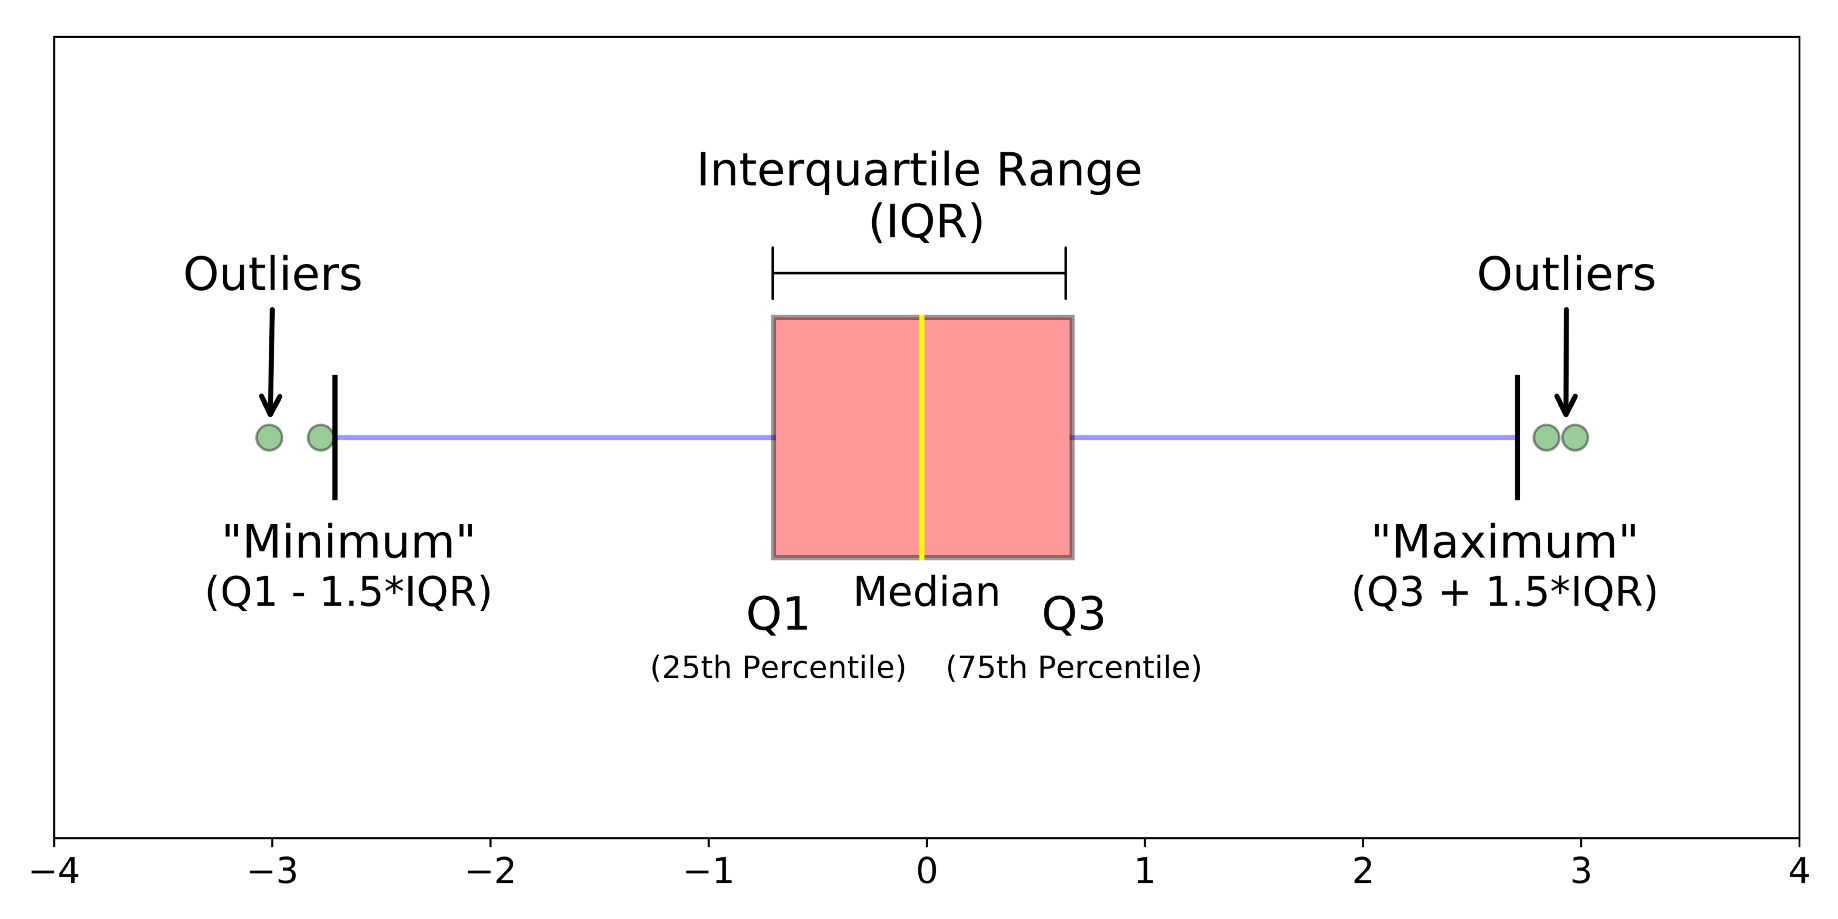
</a>
</p>


Para exibir um *boxplot* para uma coluna de um *DataFrame* (ou uma *Series*), basta adicionar o comando `.plot.box()`. 

A seguir, vamos utilizar um *boxplot* para analisar a distribuição dos valores da coluna `danceability`, uma *feature* do Spotify que informa a probabilidade de uma música ser dançante.

In [ ]:
df['danceability'].plot.box(); # Distribuição de valores da coluna 'danceability'

Aqui, podemos perceber que a maioria dos valores dessa coluna se encontra em um patamar acima de 0,5, ou seja, **a maioria das músicas do nosso conjunto de dados possui um alto valor de `danceability`** e portanto são bastante dançantes. 

Por outro lado, são poucas as músicas com valores baixos para esta métrica (*outliers*).

<br>

> *Boxplots* também podem servir para comparar distribuições de <ins>duas ou mais variáveis</ins>, e a estrutura de *DataFrame* do Pandas permite fazer tais comparações de forma simples. 

A seguir, vamos comparar a distribuição das colunas `danceability` e `acousticness`, que informa a probabilidade de uma música ser acústica.  

In [ ]:
# Distribuição das colunas 'danceability' e 'acousticness'
df[['danceability', 'acousticness']].plot.box();

Neste gráfico, os valores de `acousticness` estão em sua maioria abaixo de 0,5, com poucos *outliers* com valores altos. Assim, podemos afirmar que **a maioria dos hits, além de serem dançantes, são não-acústicas (geralmente gravadas em estúdio)**.

> **DICA:** Para exibir um boxplot horizontal, basta utilizar o parâmetro `vert`.

In [ ]:
# Distribuição das colunas 'danceability' e 'acousticness'
df[['danceability', 'acousticness']].plot.box(vert=False);

<a id="histogramas"></a>
### Histogramas

Já um histograma é uma representação da distribuição de dados numéricos, mostrando a **frequência dos valores** que ocorrem em um conjunto de dados. 

O intervalo em que os valores ocorrem é dividido em partes iguais (*bins*), e a quantidade de valores que estão em cada uma dessas partes é representada por barras. 

> **ATENÇÃO:** Diferentemente dos gráficos de barras, histogramas não possuem espaços entre as barras por representarem valores em um espectro contínuo.

No Pandas, um histograma de valores é facilmente construído adicionando o comando `.hist()` em um *DataFrame* ou *Series*. 

Aqui, construímos a seguir histogramas com a distribuição de valores das colunas `danceability` e `acousticness` do conjunto de músicas que entraram nas paradas globais do Spotify.

In [ ]:
df['danceability'].hist(); # Histograma de valores de 'danceability'

In [ ]:
# Histograma de valores de 'danceability' e 'acousticness'
df[['danceability','acousticness']].hist();

Observe que as mesmas conclusões dos *boxplots* podem ser obtidas a partir dos histogramas, por serem duas formas diferentes de visualizar a mesma informação, i.e., a distribuição dos valores. 

<br>

> **DICA:** O número de barras (*bins*) pode ser alterado pelo parâmetro de mesmo nome.

In [ ]:
df[['danceability','acousticness']].hist(bins=30);

<br>

---

<a id="correlacoes"></a>
## Correlações

Em estatística, a correlação é uma métrica que informa o grau em que duas ou mais variáveis estão relacionadas entre si. 

A correlação entre variáveis pode ser medida por um coeficiente, cujo valor varia entre -1 e 1:

- Se o coeficiente é exatamente igual a 1, ela é **totalmente positiva**; 
- Um coeficiente de correlação igual a -1 indica uma correlação **totalmente negativa**;
- Valores de correlação iguais a zero informam que **não existe correlação explícita entre as variáveis consideradas**. 

Existem várias formas de se calcular coeficientes de correlação, dentre as quais pode-se eleger dois principais:

- Pearson ($r$): mede a correlação **linear** (de primeira ordem) entre variáveis;
- Spearman ($\rho$): mede correlação **monotônica** entre variáveis, i.e., utiliza a ordem dos dados ao invés dos valores em si;

<br>

> **E como calcular correlações no Pandas?**

O Pandas dispõe da função `corr()`, que pode ser facilmente aplicada tanto para *Series* quanto para *DataFrame*. 

No exemplo a seguir, vamos calcular o coeficiente de Pearson para as colunas `energy` e `loudness`, que medem a intensidade de uma música e a altura medida em decibéis (dB), respectivamente.

> **DICA:** Para determinar o tipo de correlação calculado, basta alterar o parâmetro `method`. Além dos coeficientes de Pearson e Spearman, a função `corr()` do Pandas também permite calcular a correlação de Kendall ($\tau$), que também é baseada na ordem das variáveis.

In [ ]:
# Correlação de Pearson entre as colunas energy e loudness
df['energy'].corr(other=df['loudness'], method='pearson')  

A partir deste resultado, pode-se dizer que a **correlação linear entre essas duas variáveis e forte e positiva**, pois o valor de $0.737$ é muito próximo de 1. 

Ou seja, à medida em que o valor de `energy` aumenta, o valor de `loudness` também segue essa tendência, e vice-versa. 

> **ATENÇÃO:** Uma correlação alta não necessariamente implica causalidade, e portanto não é possível afirmar que uma coisa acontece por causa da outra, mas sim que ambas ocorrem juntas.

<br>

Além disso, cientistas de dados frequentemente calculam correlações entre mais de duas variáveis para ter uma visão mais global de algum fenômeno. 

Então, **matrizes de correlação** são bastante úteis, pois permitem uma fácil e rápida visualização em única estrutra de dados. 

A seguir, é mostrada a matriz de correlação entre algumas *features* acústicas das música, isto é, obtidas do áudio da canção.

In [ ]:
# Construção da matriz de correlação para features acústicas
acoustic_features = ['acousticness', 'danceability', 'energy', 'instrumentalness','loudness', 'valence']
df[acoustic_features].corr(method='spearman')    # Aqui, vamos utilizar a correlação de Spearman

## Conclusão

A análise exploratória dos dados possui uma **grande interseção com a etapa de visualização de dados**. Isso se deve ao fato de muitas ferramentas de análise de dados produzem gráficos como resultado, como por exemplo histogramas, *boxplots*, dentre outros. 

No entanto, as informações detalhadas sobre os diferentes tipos de visualizações e como personalizá-las são abordadas no próximo notebook ([2.4.Visualizacao.ipynb](2.4.Visualizacao.ipynb)). 